In [1]:
import tensorflow as tf
from tensorflow import keraseras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#importing data from kera directly

(X_train, y_train),(X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

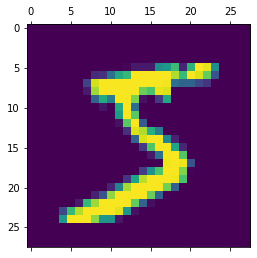

In [8]:
#SHOWING IMAGE
plt.matshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
X_train.shape

(60000, 28, 28)

In [22]:
#scale the value for better accuracy
X_train = X_train / 255
X_test = X_test / 255

In [24]:
#so know conert array into single dim array
X_train_flatten = X_train.reshape(len(X_train),28*28 )
X_test_flatten = X_test.reshape(len(X_test),28*28 )

In [25]:
X_test_flatten.shape

(10000, 784)

In [ ]:
#know we will create a simple neural network

#model without any hidden layer
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])
model.compile(optimizer='adam', 
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

In [51]:
#model with hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer='adam', 
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy']
)

model.fit(X_train_flatten, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2722 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1231 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0848 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0505 - accuracy: 0.9848


In [63]:
#keras also have it self flatten layer 
#model with hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,  activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(optimizer='adam', 
              loss= 'sparse_categorical_crossentropy',
              metrics= ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2658 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1232 - accuracy: 0.9645
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9843


In [52]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0754 - accuracy: 0.9754


[0.07537465542554855, 0.9753999710083008]

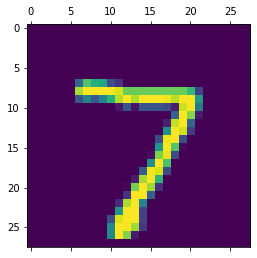

In [53]:
#plot the value to be predicted
plt.matshow(X_test[0])

In [54]:
y_pred = model.predict(X_test_flatten)

In [55]:
y_pred[0]

array([1.7466184e-01, 4.7862530e-04, 6.1809218e-01, 9.4498241e-01,
       8.8253255e-06, 1.1099398e-02, 1.4844752e-06, 9.9999475e-01,
       2.3474783e-01, 2.6669598e-01], dtype=float32)

In [56]:
# we want all predicted labels so 
y_pred_labels = [np.argmax(i) for i in y_pred]

In [57]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [58]:
p = np.argmax(y_pred[0])

In [59]:
p

7

In [60]:
#drawing confusion metrix
cn = tf.math.confusion_matrix(labels=y_test,predictions= y_pred_labels)
cn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    0,    0,    0,    4,    1,    4,    1],
       [   0, 1125,    2,    1,    0,    0,    3,    0,    4,    0],
       [   2,    3, 1013,    1,    0,    0,    2,    3,    8,    0],
       [   0,    1,    7,  984,    0,    4,    0,    2,    8,    4],
       [   2,    0,    3,    0,  941,    1,    8,    2,    0,   25],
       [   2,    0,    0,   11,    1,  864,    3,    0,    9,    2],
       [   1,    2,    2,    1,    1,    2,  945,    0,    4,    0],
       [   3,    7,   14,    4,    1,    0,    0,  986,    4,    9],
       [   1,    0,    3,    4,    1,    0,    3,    3,  956,    3],
       [   2,    5,    0,    6,    6,    4,    0,    6,    8,  972]])>

Text(69.0, 0.5, 'Truth')

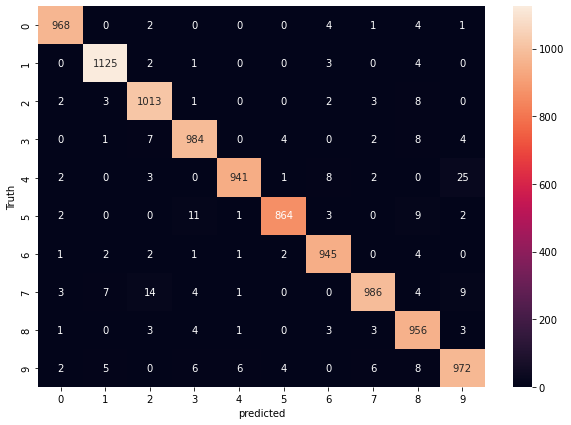

In [61]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cn, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')